In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re 
from matplotlib import style
import seaborn as sns


In [13]:
#Cau1
with open('Dataset/titanic.csv') as f :
    df = pd.read_csv(f, dtype={'age': np.float64, 'sipsp': np.int64, 'parch': np.int64})
df.head(12)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [14]:
#Cau2
total = df.isnull().sum().sort_values(ascending=False)
percent1 = df.isnull().sum()/df.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingdata = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingdata.head(5)


,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


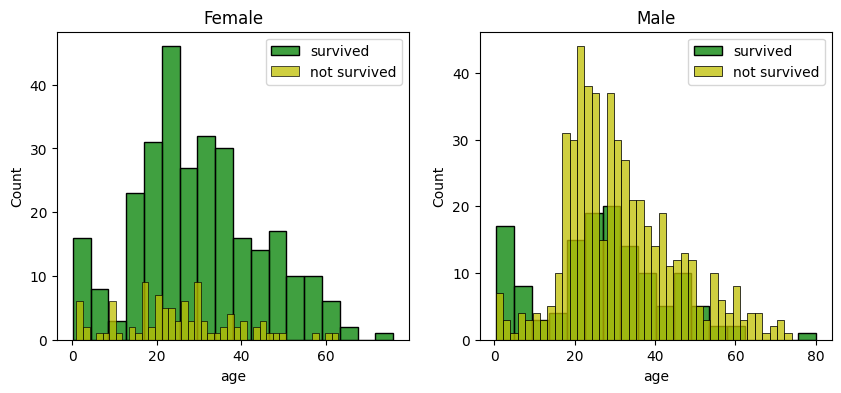

In [15]:
#Cau3
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.histplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax=axes[0], kde=False, color='g')
ax = sns.histplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax=axes[0], kde=False, color='y')
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax=axes[1], kde=False, color='g')
ax = sns.histplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax=axes[1], kde=False, color='y')
ax.legend()
_ = ax.set_title('Male')


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


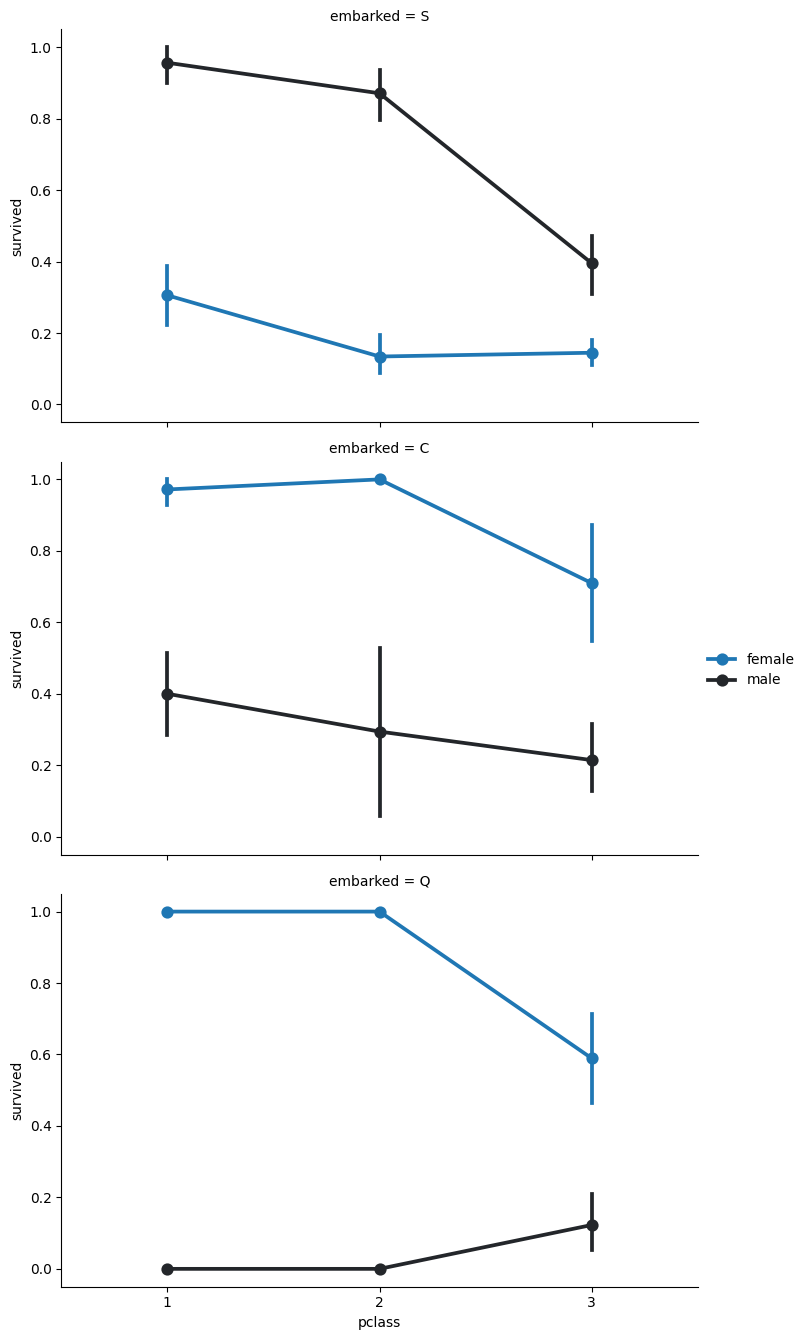

In [16]:
#Cau4
FacetGrid = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()


In [17]:
#Cau5
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives']>0, 'not_alone'] = 0
    dataset.loc[dataset['relatives']==0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()


not_alone
1    790
0    519
Name: count, dtype: int64

In [18]:
#Cau6
deck = {"A": 1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)

df = df.drop(['cabin'], axis = 1)
